![](https://i.imgur.com/qrtlqTe.png)

# Introduction to this Notebook

Approaching the EEG Fuzzy Logic and trying/ comparing various methods regarding the various techniques of the pipeline.

### Goal

Creating a general pipeline that will data real time eeg recordings and classifies the mental state of the person using it.
The main innovations:
* -> keep the process extra simple and easy for the user
* -> applying best mathematical and ML methods for the best result
* -> test it in an already existing system/ app : Neurofusion
* -> gather everything and providing a product/ feature

### Pipeline
proper eeg recordings/ Data colelction based on both the hardware and the astrobird game -> Gathering correct data format and extracting chunks of interest based on the timestamps of the game -> Signal Denoise -> Feature Extraction -> Data Description / information of interest -> Classifing the state 

### Notes

![](https://cdn-icons-png.flaticon.com/256/3800/3800406.png)


This Notebook will be based on the really helpful paper:
Md. Mustafizur Rahman, Ajay Krishno Sarkar, Md. Amzad Hossain, Md. Selim Hossain, Md. Rabiul Islam, Md. Biplob Hossain, Julian M.W. Quinn, Mohammad Ali Moni,
Recognition of human emotions using EEG signals: A review,
Computers in Biology and Medicine,
Volume 136,
2021,
104696,
ISSN 0010-4825,
https://doi.org/10.1016/j.compbiomed.2021.104696.
(https://www.sciencedirect.com/science/article/pii/S001048252100490X)
*Abstract: Assessment of the cognitive functions and state of clinical subjects is an important aspect of e-health care delivery, and in the development of novel human-machine interfaces. A subject can display a range of emotions that significantly influence cognition, and emotion classification through the analysis of physiological signals is a key means of detecting emotion. Electroencephalography (EEG) signals have become a common focus of such development compared to other physiological signals because EEG employs simple and subject-acceptable methods for obtaining data that can be used for emotion analysis. We have therefore reviewed published studies that have used EEG signal data to identify possible interconnections between emotion and brain activity. We then describe theoretical conceptualization of basic emotions, and interpret the prevailing techniques that have been adopted for feature extraction, selection, and classification. Finally, we have compared the outcomes of these recent studies and discussed the likely future directions and main challenges for researchers developing EEG-based emotion analysis methods.




Also special thanks to chatgpt for helping me with the dataframes format! 

![](https://i.etsystatic.com/39709653/r/il/51ba4b/4620023641/il_340x270.4620023641_28es.jpg)

# EEG Data Recording

Used Mentalab/ Neurosity headset
* https://neurosity.co/
* https://mentalab.com/


*5.4. EEG electrodes Usually EEG devices record brain signals using electrodes over the scalp according to the 10/20 methodology. Sometimes maintaining so many electrodes may be difficult for the users, and this makes the systems complex. Therefore, the number of electrodes must be kept low to avoid system difficulty. It is for this reason that the electrode numbers used in the studies ranged from 2 to 62. Only 17% of the studies (9 out of 54) used less than 12 electrodes, while 13% of studies (7 works out of 54) used 14 electrodes. One study [81] found that the most reliable electrode positions for detecting emotional valence are F3 and F4. Valenzi et al. [82] had used eight electrodes to classify the emotion and obtained an accuracy of 87.5%. Another two articles [52,58] recorded EEG signals using only one electrode, while article [83] utilized three channels to detect the signal. S. Wu et al. [56] utilized two channels, Fp1 and Fp2, to detect emotions and obtained an accuracy of 76.34%. About 41% of the studies (22 out of 54) utilized 32 electrodes to record the EEG signal in the past studies. Moreover, 24% of the studies (13 out of 54) used 62 electrodes; two studies utilized 40 and 60 electrodes, respectively (see Fig. 7).* 


We are using 8 channels:

**CP3, C3 F5, PO3, PO4, F6, C4, CP4**

![](https://i.imgur.com/6VPj2Jz.png)

# Analysis

## Signal Processing [ Artifact Removal ] 

## Frequency Analysis



In [93]:
# Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib.pyplot import plot 

import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))



/kaggle/input/testdata/focus_0344.json
/kaggle/input/testdata/calm_0344.json
/kaggle/input/testdata/raw_0344.csv
/kaggle/input/calm-and-focus-neurofusion/calm2.json
/kaggle/input/calm-and-focus-neurofusion/calm7.json
/kaggle/input/calm-and-focus-neurofusion/focus4.json
/kaggle/input/calm-and-focus-neurofusion/calm4.json
/kaggle/input/calm-and-focus-neurofusion/focus8.json
/kaggle/input/calm-and-focus-neurofusion/calm9.json
/kaggle/input/calm-and-focus-neurofusion/calm8.json
/kaggle/input/calm-and-focus-neurofusion/calm1.json
/kaggle/input/calm-and-focus-neurofusion/calm6.json
/kaggle/input/calm-and-focus-neurofusion/focus2.json
/kaggle/input/calm-and-focus-neurofusion/focus5.json
/kaggle/input/calm-and-focus-neurofusion/focus7.json
/kaggle/input/calm-and-focus-neurofusion/calm10.json
/kaggle/input/calm-and-focus-neurofusion/focus10.json
/kaggle/input/calm-and-focus-neurofusion/focus3.json
/kaggle/input/calm-and-focus-neurofusion/focus9.json
/kaggle/input/calm-and-focus-neurofusion/calm

## Understanding the data we have in our hands
![](https://i.imgur.com/4pk6732.png)

In [71]:
os.chdir("/kaggle/input/")
os.listdir() 

#df=pd.read_json('/kaggle/input/emotions/neutral.json')

#df.info()

#df.describe()

# read raw eeg data
df=pd.read_csv('/kaggle/input/testdata/raw_0344.csv')
# convert all unixtimestamp to timestamp 
df['unixTimestamp']=pd.to_datetime(df['unixTimestamp'], unit='ms', utc=True)

#unit = s - when value is in seconds
#unit = ms - when value is in milliseconds   # raw is in ms so ms

print(df)
df.info()

df.describe()

# get the timestamps for calm an focus state labels vreated based on the alpha and the gamma waves
dfc=pd.read_json('/kaggle/input/testdata/calm_0344.json')

print(dfc)
dfc.info()


dff=pd.read_json('/kaggle/input/testdata/focus_0344.json')
print(dff)
dff.info()



        Unnamed: 0                    unixTimestamp          CP3          C3  \
0                0 2023-01-25 07:05:45.954000+00:00   685.766172  308.118444   
1                1 2023-01-25 07:05:45.958000+00:00  1002.813066  438.474363   
2                2 2023-01-25 07:05:45.962000+00:00  1303.089298  566.315057   
3                3 2023-01-25 07:05:45.966000+00:00  1606.315908  695.084988   
4                4 2023-01-25 07:05:45.970000+00:00  1892.385570  817.403220   
...            ...                              ...          ...         ...   
153467      153467 2023-01-25 07:15:45.436000+00:00    -5.157545    1.915821   
153468      153468 2023-01-25 07:15:45.440000+00:00    -4.250026    1.016305   
153469      153469 2023-01-25 07:15:45.444000+00:00    -3.336578    1.188675   
153470      153470 2023-01-25 07:15:45.448000+00:00    -2.823140    1.576664   
153471      153471 2023-01-25 07:15:45.452000+00:00    -2.888212    1.032908   

                 F5         PO3        

We will get 5 seconds events and create a dataset with the eeg signals for those epochs containing the label of calm or focused


Create a dataframe for just one channel and put columns for focus and calm with their timestamps

In [72]:
#combine focus and calm dataframes together and sort based on the timestamps from start to finish

# Combine the two DataFrames
df_combined = pd.concat([dfc, dff])

# Sort 
df_combined_sorted = df_combined.sort_values('timestamp')
# Reset the index starting from 1
df_combined_sorted = df_combined_sorted.reset_index(drop=True)
df_combined_sorted.index += 1
print(df_combined_sorted[1:10])



    label     metric  probability               timestamp
2    calm  awareness     0.000000 2023-01-25 07:05:46.924
3   focus  awareness     0.191566 2023-01-25 07:05:47.941
4    calm  awareness     0.112417 2023-01-25 07:05:47.954
5   focus  awareness     0.455648 2023-01-25 07:05:49.150
6    calm  awareness     0.320532 2023-01-25 07:05:49.180
7   focus  awareness     0.353778 2023-01-25 07:05:49.864
8    calm  awareness     0.182826 2023-01-25 07:05:49.891
9   focus  awareness     0.246882 2023-01-25 07:05:50.867
10   calm  awareness     0.288646 2023-01-25 07:05:50.900


 ... so turns out we cannot short based on more "calms" or "focus" on certain duration periods because it literally goes from one to another 
like ping pong so it is not a good approach...
so we are going to use probability instead
I will set a windows of one second ( including all millisecond examples) I will add all the prob of calm and focus and I will
 label the second under the one with the higher sum of probabilities

In [73]:


# Remove milliseconds from the 'timestamp' column
df_combined_sorted['timestamp'] = df_combined_sorted['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
print(print(df_combined_sorted[1:10]))

sum_values = df_combined_sorted.groupby(['timestamp', 'label'])['probability'].sum()

print(sum_values[0:20])

# Find the label with the highest sum for each timestamp
max_labels = sum_values.reset_index().groupby('timestamp')['label'].max()

print(max_labels)
max_labels=max_labels.to_frame()
max_labels=max_labels.reset_index()
max_labels = max_labels.rename(columns={'timestamp': 'timestamp'})

print(max_labels)



    label     metric  probability            timestamp
2    calm  awareness     0.000000  2023-01-25 07:05:46
3   focus  awareness     0.191566  2023-01-25 07:05:47
4    calm  awareness     0.112417  2023-01-25 07:05:47
5   focus  awareness     0.455648  2023-01-25 07:05:49
6    calm  awareness     0.320532  2023-01-25 07:05:49
7   focus  awareness     0.353778  2023-01-25 07:05:49
8    calm  awareness     0.182826  2023-01-25 07:05:49
9   focus  awareness     0.246882  2023-01-25 07:05:50
10   calm  awareness     0.288646  2023-01-25 07:05:50
None
timestamp            label
2023-01-25 07:05:46  calm     0.000000
                     focus    0.000000
2023-01-25 07:05:47  calm     0.112417
                     focus    0.191566
2023-01-25 07:05:49  calm     0.503358
                     focus    0.809426
2023-01-25 07:05:50  calm     0.288646
                     focus    0.246882
2023-01-25 07:05:51  calm     0.257600
                     focus    0.256991
2023-01-25 07:05:52  calm   

Seems we have mostly focus, lets check if we can have also calm somewhere

In [74]:

count_a = max_labels['label'].value_counts()['calm']

print("Count of 'calm':", count_a)

#and get the timestamps for those calms
#values = max_labels.loc[max_labels['label'] == 'timestamp', 'calm']

#print(values)

Count of 'calm': 9


KeyError: 'calm'

Visualise it


In [ ]:

series = max_labels['label'].map({'focus': 0, 'calm': 1})

plot(series)

Now we will assign those labels to the eeg data of channel C3 to create vectors for training our ML model.
for simplicity and to avoid overfitting of focus we will choose 20 examples of focus and the only 9 we have of calm.
We will keep the window of 1 second duration so the eeg data will contain all the amplitudes of the milliseconds in the 1 second period.


/tmp/ipykernel_32/3829737088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel['unixTimestamp'] = channel['unixTimestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')


                C3        unixTimestamp
0       308.118444  2023-01-25 07:05:45
1       438.474363  2023-01-25 07:05:45
2       566.315057  2023-01-25 07:05:45
3       695.084988  2023-01-25 07:05:45
4       817.403220  2023-01-25 07:05:45
...            ...                  ...
153467    1.915821  2023-01-25 07:15:45
153468    1.016305  2023-01-25 07:15:45
153469    1.188675  2023-01-25 07:15:45
153470    1.576664  2023-01-25 07:15:45
153471    1.032908  2023-01-25 07:15:45

[153472 rows x 2 columns]
153472


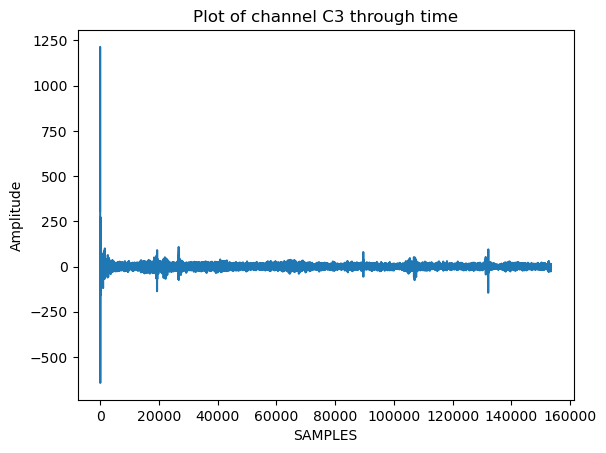

In [121]:
import matplotlib.pyplot as plt

channel= df[['C3', 'unixTimestamp']]
channel['unixTimestamp'] = channel['unixTimestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
print(channel)


# Plot through time we know fs= 256 Hz:

maxt = len(channel['C3'])  # Maximum time value
print(maxt)
#fs = 256     # Sampling frequency we will not use it as it is already in samples and not time

t = np.arange(0, maxt)

plot(t,channel['C3'])
plt.xlabel('SAMPLES')
plt.ylabel('Amplitude')
plt.title('Plot of channel C3 through time')
plt.show()

In [81]:


#plot(channel)


# and now if the timestamp is the same on the max_labels we will set the label 
label_mapping = dict(zip(max_labels['timestamp'], max_labels['label']))


# Check if the elements in column 'a' of DataFrame A are the same as the elements in column 'b' of DataFrame B
matching_elements = channel[channel['unixTimestamp'].isin(max_labels['timestamp'])]['unixTimestamp']

# Create a new column 'new_column' in DataFrame B and assign the corresponding labels from column 'a2' of DataFrame A
channel['labels'] = matching_elements.map(label_mapping)

label_mapping = dict(zip(max_labels.index, max_labels['label']))


print(channel)   # first is nan because we do not have labels for those start times

                C3        unixTimestamp
0       308.118444  2023-01-25 07:05:45
1       438.474363  2023-01-25 07:05:45
2       566.315057  2023-01-25 07:05:45
3       695.084988  2023-01-25 07:05:45
4       817.403220  2023-01-25 07:05:45
...            ...                  ...
153467    1.915821  2023-01-25 07:15:45
153468    1.016305  2023-01-25 07:15:45
153469    1.188675  2023-01-25 07:15:45
153470    1.576664  2023-01-25 07:15:45
153471    1.032908  2023-01-25 07:15:45

[153472 rows x 2 columns]
0      2023-01-25 07:05:46
1      2023-01-25 07:05:47
2      2023-01-25 07:05:49
3      2023-01-25 07:05:50
4      2023-01-25 07:05:51
              ...         
584    2023-01-25 07:15:40
585    2023-01-25 07:15:41
586    2023-01-25 07:15:42
587    2023-01-25 07:15:43
588    2023-01-25 07:15:44
Name: timestamp, Length: 589, dtype: object
            C3        unixTimestamp labels
30  609.273416  2023-01-25 07:05:46  focus
31  569.609336  2023-01-25 07:05:46  focus
32  529.486359  2023-01

/tmp/ipykernel_32/1799038442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel['unixTimestamp'] = channel['unixTimestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
/tmp/ipykernel_32/1799038442.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel['labels'] = matching_elements.map(label_mapping)


unixTimestamp                                  2023-01-25 07:05:46
labels                                                       focus
C3               [1205.9906156822203, 1213.5095471460154, 1213....
Name: 0, dtype: object
           unixTimestamp                                                 C3  \
0    2023-01-25 07:05:46  [1205.9906156822203, 1213.5095471460154, 1213....   
1    2023-01-25 07:05:47  [16.341167170976327, 18.01732529680889, 19.371...   
2    2023-01-25 07:05:49  [-9.135182270692365, -10.097381534353502, -9.2...   
3    2023-01-25 07:05:50  [10.8201908159907, 17.009897637272253, 21.9289...   
4    2023-01-25 07:05:51  [-13.693684834685474, -14.65397870859103, -17....   
..                   ...                                                ...   
584  2023-01-25 07:15:40  [10.954936426128794, 10.04180497310806, 9.3539...   
585  2023-01-25 07:15:41  [-6.4802369665931625, -5.2750665797265786, -3....   
586  2023-01-25 07:15:42  [17.370790318939576, 20.11091140707929,

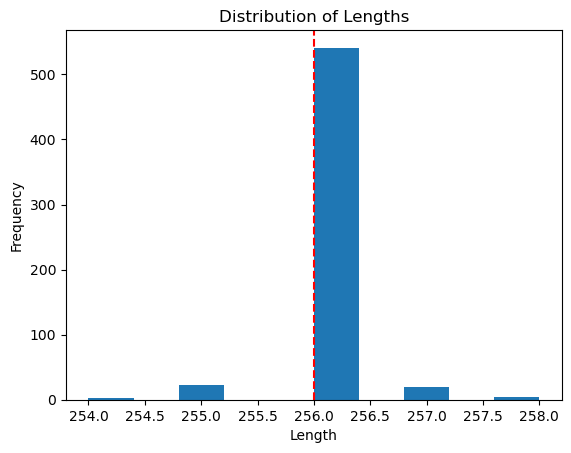

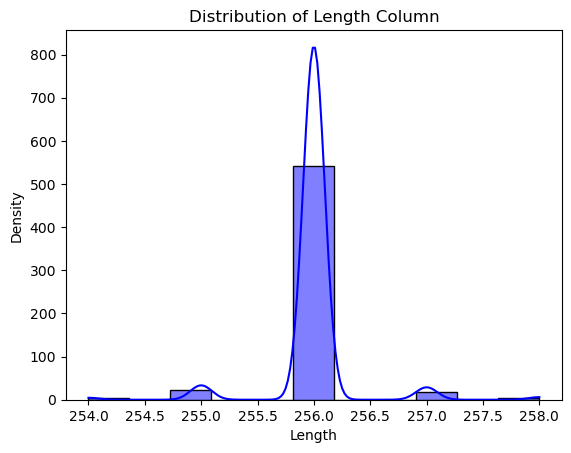

In [109]:
new_df = channel.groupby(['unixTimestamp', 'labels'])['C3'].apply(list).reset_index()


print(new_df.iloc[0]) #example of an element
new_order = ['unixTimestamp', 'C3', 'labels']  # Specify the desired column order

new_df = new_df[new_order]

print(new_df)

size_column = new_df['C3'].astype(str).str.len()

length_column = new_df['C3'].apply(len)

print(length_column)



import seaborn as sns
import matplotlib.pyplot as plt



# Plot the histogram with KDE line
sns.histplot(length_column, kde=True, color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('Length')
plt.ylabel('Density')
plt.title('Distribution of Samples Lengths ')

# Display the plot
plt.show()


So I will pick elements to train of size 256 ( that makes sense as Fs=256 and my elements are almost always of 1 sec)

In [106]:

focus_samples = new_df.loc[new_df['labels'] == 'focus'].loc[new_df['C3'].str.len() == 256].sample(n=12)[['C3', 'labels']]
calm_samples = new_df.loc[new_df['labels'] == 'calm'].loc[new_df['C3'].str.len() == 256].sample(n=8)[['C3', 'labels']]

# Concatenate the focus and calm samples into a new DataFrame
selected_samples = pd.concat([focus_samples, calm_samples], ignore_index=True)

# Shuffle the selected samples
selected_samples = selected_samples.sample(frac=1)

print(selected_samples)

                                                   C3 labels
2   [3.767540313965724, 4.282376683883075, 5.47170...  focus
18  [4.308778019137011, 6.588799638705611, 8.37834...   calm
4   [5.944204775653056, 5.871787338985563, 3.71185...  focus
8   [23.39517804283342, 18.93151439648863, 13.7743...  focus
13  [6.2577376493145, 6.384875152883119, 5.4672883...   calm
9   [-5.456592673152718, -7.078752010798395, -10.0...  focus
11  [4.608138708654419, 4.059942570067092, 2.09319...  focus
16  [-1.5416358593646131, 0.015553896649321, 3.041...   calm
3   [-8.820588153581863, -7.942634614617754, -6.72...  focus
1   [-6.788655667665276, -5.5411711218061175, -4.0...  focus
17  [12.705009260234862, 10.192830947692158, 8.598...   calm
6   [-2.536651610960715, -2.293780680731886, -3.49...  focus
15  [8.953525737746787, 7.880694759753252, 5.82330...   calm
14  [6.436299350158897, 9.153307563333687, 10.7416...   calm
5   [-11.555031027258671, -10.40735400678208, -9.6...  focus
0   [11.508323538085314,

# ML Training the model to a classifier

I will try many classification methods and compare them

## SVM

First I will train a model to classify them for example with an SVM model

![](https://datatron.com/wp-content/uploads/2021/05/Support-Vector-Machine.png)

Support Vector Machine (SVM) model is a Supervised Learning model used for classification and regression analysis. It is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.



In [114]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

# Assuming 'selected_samples' is your DataFrame with selected samples and labels
X = np.array(selected_samples['C3'].tolist())  # Convert column to a NumPy array
y = np.array(selected_samples['labels'].tolist())  # Convert column to a NumPy array

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize an SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Evaluate the trained model on the test set
accuracy = svm_model.score(X_test, y_test)

print("Accuracy:", accuracy)



Accuracy: 0.8


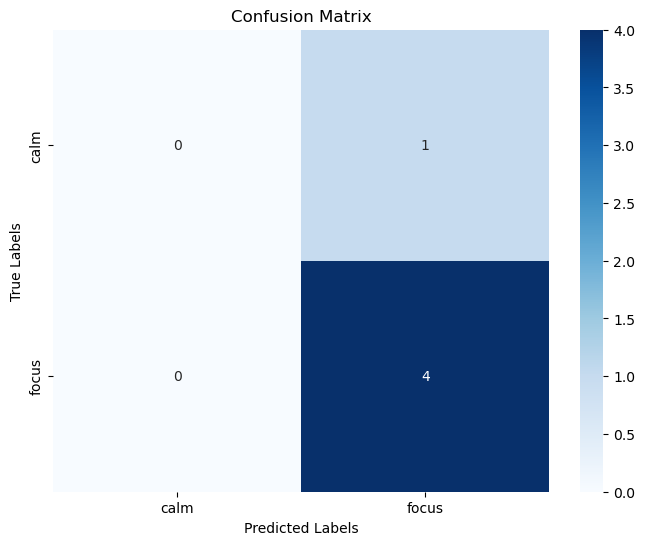

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'X_test' and 'y_test' are the test data and corresponding labels
# Assuming 'svm_model' is the trained SVM model

# Generate predictions on the test set
y_pred = svm_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique class labels
labels = np.unique(y_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


gabes analysis >70% the entire channels

Data normalisation
work with amplitude